In [2484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re            
from geopy.geocoders import Nominatim


In [2485]:
df = pd.read_csv(r"E:\ny_housing_project\data\NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [2486]:
df.tail()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752
4800,Brokered by Nyc Realty Brokers Llc,Co-op for sale,349000,1,1.0,750.000000,460 Neptune Ave Apt 14O,"Brooklyn, NY 11224","460 Neptune Ave Apt 14OBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,460,"460 Neptune Ave #14a, Brooklyn, NY 11224, USA",40.579147,-73.970949


In [2487]:
df.shape

(4801, 17)

In [2488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [2489]:
duplicates = df[df.duplicated()]
duplicates_all = df[df.duplicated(keep=False)]
duplicates_all


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
80,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
113,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
114,Brokered by Sowae Corp,Multi-family home for sale,346000,5,2.000000,2184.207862,103-12 104th St,"Ozone Park, NY 11417","103-12 104th StOzone Park, NY 11417",United States,New York,Queens County,Queens,104th Street,"103-12 104th St, Jamaica, NY 11417, USA",40.683789,-73.838104
115,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714
4770,Brokered by Sotheby's International Realty - E...,Condo for sale,2600000,3,2.000000,1729.000000,242 E 15th St Apt 1,"New York, NY 10003","242 E 15th St Apt 1New York, NY 10003",New York,New York County,New York,Manhattan,242,"242 E 15th St APT 1, New York, NY 10003, USA",40.733031,-73.985037
4775,Brokered by EXIT REALTY PREMIER,House for sale,749000,3,2.373861,2002.000000,631 Essex St,"Brooklyn, NY 11208","631 Essex StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Essex Street,"631 Essex St, Brooklyn, NY 11208, USA",40.668173,-73.880027
4780,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714


In [2490]:
df = df.drop_duplicates()

#### Xử lý cột BROKER

In [2491]:
df['BROKERTITLE'] = df['BROKERTITLE'].apply(lambda row: row.removeprefix("Brokered by"))
df['TYPE'] = df['TYPE'].apply(lambda row: row.removesuffix("for sale"))
df.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Douglas Elliman -111 Fifth Ave,Condo,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Serhant,Condo,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Sowae Corp,House,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,COMPASS,Condo,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Sotheby's International Realty - East Side Ma...,Townhouse,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [2492]:
print("Số unique BROKERTITLE ban đầu:", df['BROKERTITLE'].nunique())
print(df['BROKERTITLE'].value_counts().head(30))  

Số unique BROKERTITLE ban đầu: 1036
BROKERTITLE
 COMPASS                                                           435
 Douglas Elliman - 575 Madison Ave                                 109
 Brown Harris Stevens                                               93
 Corcoran East Side                                                 86
 RE MAX Edge                                                        75
 Winzone Realty Inc                                                 64
 Sotheby's International Realty - East Side Manhattan Brokerage     59
 E Realty International Corp                                        58
 Serhant                                                            49
 RE MAX Real Estate Professionals                                   48
 Exp Realty                                                         46
 EXP Realty                                                         44
 Corcoran Chelsea/Flatiron                                          40
 Keller Williams NYC         

In [2493]:
df['BROKERTITLE'] = df['BROKERTITLE'].str.lower().str.strip()
df['BROKERTITLE'] = df['BROKERTITLE'].str.replace(r'\s+', ' ', regex=True)
df['BROKERTITLE'] = (
    df['BROKERTITLE']
    .str.lower()
    .str.replace(r'[^a-z0-9 ]', ' ', regex=True)  # bỏ ký tự đặc biệt
    .str.replace(r'\s+', ' ', regex=True)         # bỏ khoảng trắng thừa
    .str.strip()
)
print("Số unique sau normalize:", df['BROKERTITLE'].nunique())
print(df['BROKERTITLE'].value_counts().head(10))

Số unique sau normalize: 995
BROKERTITLE
compass                                                         436
douglas elliman 575 madison ave                                 109
brown harris stevens                                             93
exp realty                                                       91
re max edge                                                      87
corcoran east side                                               86
winzone realty inc                                               64
robert defalco realty inc                                        63
sotheby s international realty east side manhattan brokerage     59
e realty international corp                                      58
Name: count, dtype: int64


In [2494]:
# Loại bỏ hậu tố
df['BROKERTITLE'] = df['BROKERTITLE'].str.replace(r' - .*$| inc\.| llc| realty| brokered by |properties|group|associates|international|entry\.com|edge|side', '', regex=True).str.strip()

# Kiểm tra sau loại hậu tố
print("Số unique sau loại hậu tố:", df['BROKERTITLE'].nunique())
print(df['BROKERTITLE'].value_counts().head(10))

Số unique sau loại hậu tố: 987
BROKERTITLE
compass                                 436
douglas elliman 575 madison ave         109
brown harris stevens                     93
exp                                      92
re max                                   87
corcoran east                            86
winzone inc                              64
robert defalco inc                       63
sotheby s  east  manhattan brokerage     59
e  corp                                  58
Name: count, dtype: int64


In [2495]:
# # Lấy unique values
# unique_brokers = df['BROKERTITLE_CLEAN'].unique()
# broker_map = {}
# for broker in unique_brokers:
#     match = process.extractOne(broker, unique_brokers, score_cutoff=80)  # 80% giống coi là cùng
#     if match:
#         broker_map[broker] = match[0]

# # Áp dụng map
# df['BROKERTITLE_CLEAN'] = df['BROKERTITLE_CLEAN'].map(broker_map).fillna(df['BROKERTITLE_CLEAN'])

# # Kiểm tra sau fuzzy
# print("Số unique sau fuzzy:", df['BROKERTITLE_CLEAN'].nunique())
# print(df['BROKERTITLE_CLEAN'].value_counts().head(30))

In [2496]:
brand_map = {
    'corcoran': 'corcoran',
    'douglas elliman': 'douglas elliman',
    'compass': 'compass',
    'sotheby': "sotheby's",
    're max': 're/max',
    'keller williams': 'keller williams',
    'coldwell banker': 'coldwell banker',
    'brown harris stevens': 'brown harris stevens',
    'exp': 'exp',
    'serhant': 'serhant'
}
def map_brand(name):
    for k, v in brand_map.items():
        if k in name:
            return v
    return name

df['BROKERTITLE'] = df['BROKERTITLE'].apply(map_brand)
print("Số unique sau brand mapping:", df['BROKERTITLE'].nunique())
print(df['BROKERTITLE'].value_counts().head(50))


Số unique sau brand mapping: 865
BROKERTITLE
compass                                453
corcoran                               356
douglas elliman                        293
re/max                                 272
keller williams                        216
brown harris stevens                   164
sotheby's                              125
exp                                    118
coldwell banker                         75
winzone inc                             64
robert defalco inc                      63
e  corp                                 58
serhant                                 50
sowae corp                              37
nobroker                                33
nest seekers  midtown                   31
momentum real estate                    28
charles rutenberg inc                   21
neuhaus inc                             21
century homes                           20
ditommaso real estate                   19
bergen basin                            18
5 boro co

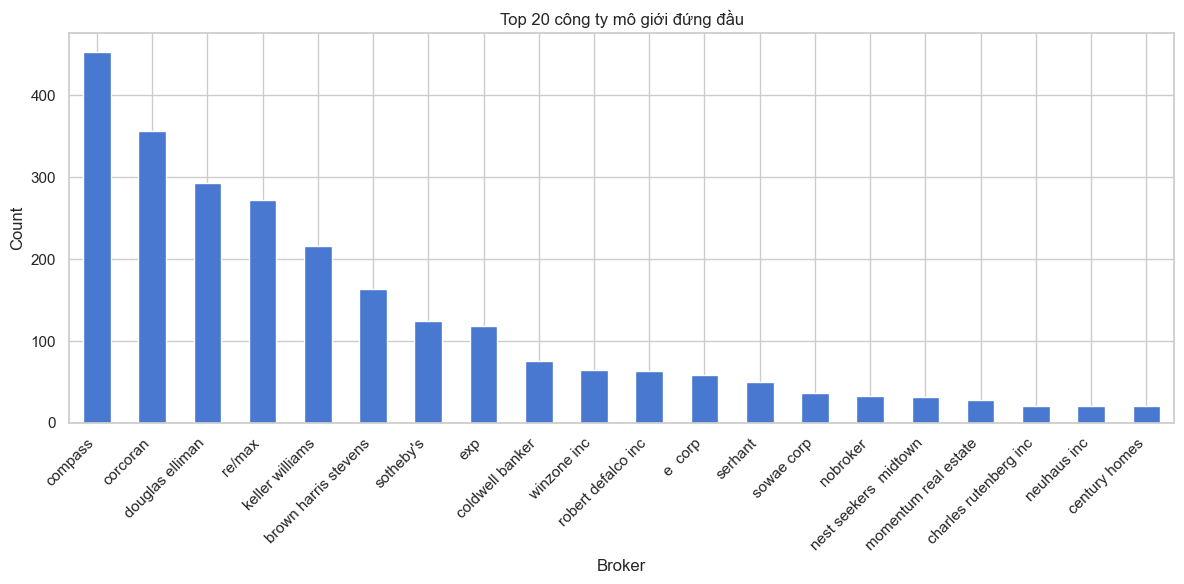

In [2497]:
top_brokers = df['BROKERTITLE'].value_counts().head(20)

# Vẽ bar chart
plt.figure(figsize=(12,6))
top_brokers.plot(kind='bar')

plt.title("Top 20 công ty mô giới đứng đầu")
plt.xlabel("Broker")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [2498]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,douglas elliman,Condo,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,serhant,Condo,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,sowae corp,House,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,compass,Condo,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,sotheby's,Townhouse,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


#### Xử lý cột TYPE

In [2499]:
df['TYPE'] = (
    df['TYPE']
    .str.lower()
    .str.strip()
    .str.replace(r'[-/]', ' ', regex=True)
)
df['TYPE'].value_counts()

TYPE
co op                1388
house                 966
condo                 842
multi family home     699
townhouse             288
pending               229
contingent             87
land                   47
for sale               20
foreclosure            14
condop                  4
coming soon             2
mobile house            1
Name: count, dtype: int64

In [2500]:
# Tách STATUS
df['STATUS'] = df['TYPE'].str.extract(r'(pending|for sale|sold|contingent|foreclosure|coming soon)', flags=re.IGNORECASE)[0].str.lower().fillna('unknown')

# Tách PROPERTY_TYPE (loại bỏ trạng thái)
df['PROPERTY_TYPE'] = df['TYPE'].str.replace(r'pending|for sale|sold|contingent|foreclosure|coming soon', '', regex=True, flags=re.IGNORECASE).str.strip().str.lower().fillna('unknown')

# Kiểm tra kết quả
print("Số unique STATUS:", df['STATUS'].nunique())
print(df['STATUS'].value_counts())
print("Số unique PROPERTY_TYPE:", df['PROPERTY_TYPE'].nunique())
print(df['PROPERTY_TYPE'].value_counts())
print(df[['TYPE', 'STATUS', 'PROPERTY_TYPE']].head(10))

Số unique STATUS: 6
STATUS
unknown        4235
pending         229
contingent       87
for sale         20
foreclosure      14
coming soon       2
Name: count, dtype: int64
Số unique PROPERTY_TYPE: 9
PROPERTY_TYPE
co op                1388
house                 966
condo                 842
multi family home     699
                      352
townhouse             288
land                   47
condop                  4
mobile house            1
Name: count, dtype: int64
        TYPE   STATUS PROPERTY_TYPE
0      condo  unknown         condo
1      condo  unknown         condo
2      house  unknown         house
3      condo  unknown         condo
4  townhouse  unknown     townhouse
5      house  unknown         house
6      condo  unknown         condo
7      house  unknown         house
8      co op  unknown         co op
9      co op  unknown         co op


In [2501]:
# Chuẩn hóa PROPERTY_TYPE
df['PROPERTY_TYPE'] = df['PROPERTY_TYPE'].replace({
    'mobile house': 'mobile home',  # Sửa lỗi đánh máy
    'condop': 'condo'  # Gom vào condo
}).str.strip()
df.drop(columns=['TYPE'],inplace= True )
# Kiểm tra lại
print(df['PROPERTY_TYPE'].unique())
print(df['PROPERTY_TYPE'].value_counts())

['condo' 'house' 'townhouse' 'co op' 'multi family home' '' 'land'
 'mobile home']
PROPERTY_TYPE
co op                1388
house                 966
condo                 846
multi family home     699
                      352
townhouse             288
land                   47
mobile home             1
Name: count, dtype: int64


In [2502]:
# Gán rỗng thành "other"
df.loc[df['PROPERTY_TYPE'] == '', 'PROPERTY_TYPE'] = 'other'

# Kiểm tra lại
print("Các giá trị unique sau xử lý rỗng:", df['PROPERTY_TYPE'].nunique())
print("Tần suất của PROPERTY_TYPE:\n", df['PROPERTY_TYPE'].value_counts())

Các giá trị unique sau xử lý rỗng: 8
Tần suất của PROPERTY_TYPE:
 PROPERTY_TYPE
co op                1388
house                 966
condo                 846
multi family home     699
other                 352
townhouse             288
land                   47
mobile home             1
Name: count, dtype: int64


In [2503]:
# Lọc tất cả các hàng có PROPERTY_TYPE = 'other'
df_other = df[df['PROPERTY_TYPE'] == 'other']
df_other


,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE
59,douglas elliman,3150000,3,2.000000,1952.000000,184 Lincoln Pl Unit 2,"Brooklyn, NY 11217","184 Lincoln Pl Unit 2Brooklyn, NY 11217",New York,Kings County,Brooklyn,Park Slope,184,"184 Lincoln Pl #2, Brooklyn, NY 11217, USA",40.675404,-73.974205,for sale,other
67,better homes and gardens real estate safari,619888,3,2.000000,1400.000000,35 Center Pl,"Staten Island, NY 10306","35 Center PlStaten Island, NY 10306",United States,New York,Richmond County,Staten Island,Center Place,"35 Center Pl, Staten Island, NY 10306, USA",40.563212,-74.100252,contingent,other
79,gosen inc,269000,5,2.000000,2184.207862,24149 148th Dr,"Rosedale, NY 11422","24149 148th DrRosedale, NY 11422",United States,New York,Queens County,Queens,148th Drive,"241-49 148th Dr, Jamaica, NY 11422, USA",40.653443,-73.741373,foreclosure,other
85,charles rutenberg inc,950000,6,2.373861,3384.000000,254-06 Craft Ave Unit 2,"Jamaica, NY 11422","254-06 Craft Ave Unit 2Jamaica, NY 11422",New York,Queens County,Queens,Jamaica,254-06,"254-06 Craft Ave #2, Jamaica, NY 11422, USA",40.649903,-73.735471,pending,other
90,built by toll brothers,950000,1,1.000000,621.000000,The Rockwell # 3A,"New York, NY 10025","The Rockwell # 3ANew York, NY 10025",United States,New York,New York County,New York,West 103rd Street,"218 W 103rd St, New York, NY 10025, USA",40.798658,-73.967904,for sale,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718,city connections,599000,1,1.000000,578.000000,20 West St Apt 15F,"New York, NY 10004","20 West St Apt 15FNew York, NY 10004",New York,New York County,New York,Manhattan,20,"20 West St #15f, New York, NY 10004, USA",40.706541,-74.015824,contingent,other
4756,corcoran,1175000,3,1.000000,1500.000000,145 Central Park W Apt 1B,"New York, NY 10023","145 Central Park W Apt 1BNew York, NY 10023",New York,New York County,New York,Manhattan,145,"145 Central Park W #1b, New York, NY 10023, USA",40.777895,-73.975097,pending,other
4763,jamie connie real estate grp,1058000,3,2.000000,2184.207862,105-26 65th Rd,"Forest Hills, NY 11375","105-26 65th RdForest Hills, NY 11375",United States,New York,Queens County,Queens,65th Road,"105-26 65th Rd, Flushing, NY 11375, USA",40.730375,-73.849729,pending,other
4776,century 21 kr,555000,3,2.373861,2184.207862,780 Stafford Ave,"Staten Island, NY 10309","780 Stafford AveStaten Island, NY 10309",United States,New York,Richmond County,Staten Island,Stafford Avenue,"780 Stafford Ave, Staten Island, NY 10309, USA",40.540344,-74.204106,pending,other


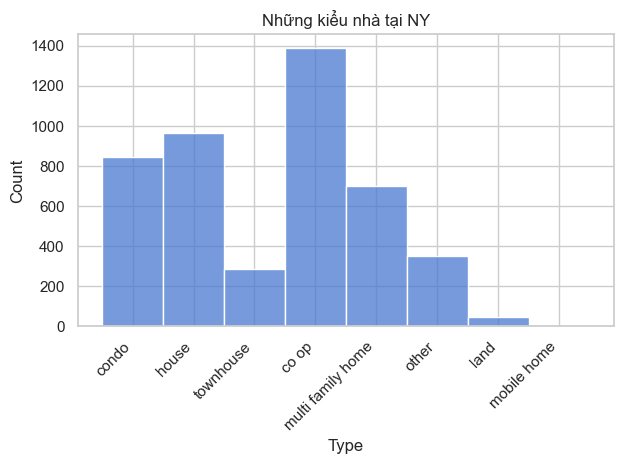

In [2504]:
sns.histplot(x= df['PROPERTY_TYPE'])

plt.title("Những kiểu nhà tại NY")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


#### Kiếm tra Missing Value

In [2505]:
df.isnull().sum()

BROKERTITLE                    0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
STATUS                         0
PROPERTY_TYPE                  0
dtype: int64

May mắn là không có giá trị null nào

#### Xủ lý outlier

In [2506]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.587000e+03,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000
mean,2.381172e+06,3.365816,2.377735,2177.712426,40.713932,-73.941584
std,3.206831e+07,2.628808,1.968503,2283.095559,0.087738,0.101276
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.638588,-73.987420
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726667,-73.949116
75%,1.498500e+06,4.000000,3.000000,2184.207862,40.771913,-73.869455
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [2507]:
print("Giá trị min/max trước lọc:")
print(df['PRICE'].min(), df['PRICE'].max())
print(df['PROPERTYSQFT'].min(), df['PROPERTYSQFT'].max())

lower_price, upper_price = df['PRICE'].quantile([0.01, 0.99])
Q1 = df['PROPERTYSQFT'].quantile(0.25)
Q3 = df['PROPERTYSQFT'].quantile(0.75)
IQR = Q3 - Q1

Giá trị min/max trước lọc:
2494 2147483647
230.0 65535.0


In [ ]:

# --- Tính ngưỡng thống kê trước ---
lower_price, upper_price = df['PRICE'].quantile([0.01, 0.99])
Q1 = df['PROPERTYSQFT'].quantile(0.25)
Q3 = df['PROPERTYSQFT'].quantile(0.75)
IQR = Q3 - Q1
luxury_threshold = df['PRICE'].quantile(0.95)

def classify_segment(row):
    
    if row['PRICE'] < 10000 or row['PRICE'] == 2147483647:
        return "Error"
    if row['PROPERTYSQFT'] < 200 or row['PROPERTYSQFT'] > 30000:
        return "Error"
    if row['BEDS'] > 20 or row['BATH'] > 20:
        return "Error"
    
    # Luxury segment
    if row['PRICE'] > luxury_threshold:
        return "Luxury"
    
    # Outlier theo thống kê
    if (row['PRICE'] < lower_price) or (row['PRICE'] > upper_price) or \
       (row['PROPERTYSQFT'] < Q1 - 1.5*IQR) or (row['PROPERTYSQFT'] > Q3 + 1.5*IQR):
        return "Outlier"
    
    # Còn lại là Normal
    return "Normal"

df['segment'] = df.apply(classify_segment, axis=1)

df_filtered = df[df['segment'] == 'Normal']

print(df['segment'].value_counts())

segment
Normal     4080
Outlier     262
Luxury      224
Error        21
Name: count, dtype: int64


In [2509]:
# Lọc tất cả bản ghi là Outlier
df_outliers = df[df['segment'] == 'Outlier']

# Kiểm tra số lượng và thống kê
print("Số lượng outlier:", df_outliers.shape[0])
print(df_outliers[['PRICE', 'PROPERTYSQFT', 'BEDS', 'BATH']].describe())


Số lượng outlier: 262
              PRICE  PROPERTYSQFT        BEDS        BATH
count  2.620000e+02    262.000000  262.000000  262.000000
mean   2.424668e+06   4523.035445    6.099237    4.227871
std    1.770853e+06   2401.711625    3.503375    2.486328
min    4.950000e+04    230.000000    1.000000    1.000000
25%    1.191250e+06   3789.500000    3.000000    2.373861
50%    2.150000e+06   4379.500000    6.000000    4.000000
75%    3.200000e+06   5340.000000    8.000000    6.000000
max    6.900000e+06  21000.000000   20.000000   17.000000


In [2510]:
df_filtered

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,segment
0,douglas elliman,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,unknown,condo,Normal
2,sowae corp,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,unknown,house,Normal
6,douglas elliman,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777,unknown,condo,Normal
8,pantiga inc,265000,1,1.0,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,Normal
9,century 21 mk,440000,2,1.0,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694,unknown,co op,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,compass,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,unknown,co op,Normal
4797,mjr real estate,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,unknown,co op,Normal
4798,douglas elliman,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,unknown,co op,Normal
4799,e corp,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,unknown,condo,Normal


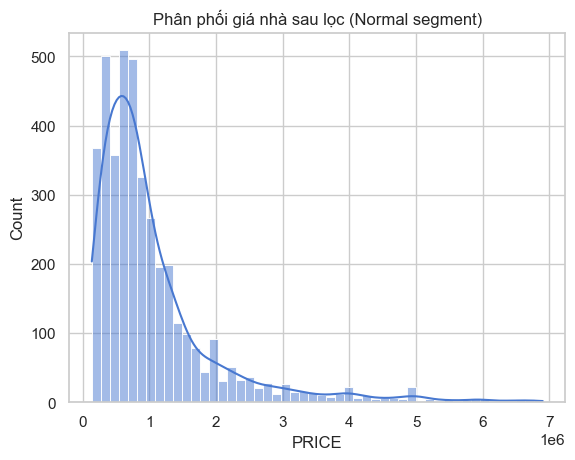

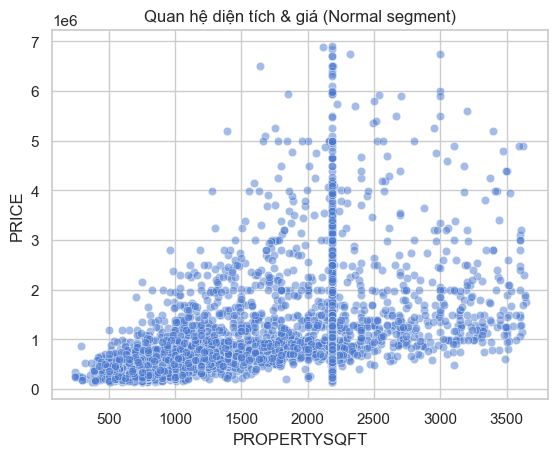

Luxury sample:
        PRICE  PROPERTYSQFT         LOCALITY
1   195000000       17545.0         New York
4    55000000       14175.0         New York
69   65000000       15200.0         New York
76   31000000        4492.0  New York County
82   12950000        3344.0         New York


In [2511]:
sns.histplot(df_filtered['PRICE'], bins=50, kde=True)
plt.title("Phân phối giá nhà sau lọc (Normal segment)")
plt.show()

sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=df_filtered, alpha=0.5)
plt.title("Quan hệ diện tích & giá (Normal segment)")
plt.show()

# x`Xem luxury homes riêng
print("Luxury sample:")
print(df[df['segment']=='Luxury'][['PRICE','PROPERTYSQFT','LOCALITY']].head())

In [2512]:
df_normal = df[df['segment'] == 'Normal']
df_luxury = df[df['segment'] == 'Luxury']
df_error  = df[df['segment'] == 'Error']
df

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,segment
0,douglas elliman,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,unknown,condo,Normal
1,serhant,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,unknown,condo,Luxury
2,sowae corp,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,unknown,house,Normal
3,compass,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,unknown,condo,Outlier
4,sotheby's,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,unknown,townhouse,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,compass,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,unknown,co op,Normal
4797,mjr real estate,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,unknown,co op,Normal
4798,douglas elliman,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,unknown,co op,Normal
4799,e corp,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,unknown,condo,Normal


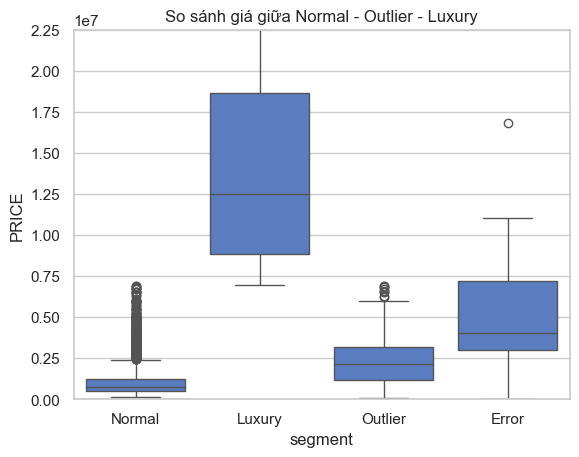

In [2513]:
sns.boxplot(x='segment', y='PRICE', data=df)
plt.ylim(0, df['PRICE'].quantile(0.99))  
plt.title("So sánh giá giữa Normal - Outlier - Luxury")
plt.show()


In [2514]:
df_luxury

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,segment
1,serhant,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,unknown,condo,Luxury
4,sotheby's,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,unknown,townhouse,Luxury
69,sotheby's,65000000,3,2.373861,15200.000000,4 E 79th St,"New York, NY 10075","4 E 79th StNew York, NY 10075",United States,New York,New York County,New York,East 79th Street,"4 E 79th St, New York, NY 10075, USA",40.776561,-73.963317,unknown,townhouse,Luxury
76,corcoran,31000000,3,4.000000,4492.000000,111 W 57th St # 50,"New York, NY 10019","111 W 57th St # 50New York, NY 10019",New York,New York County,New York,Manhattan,111,"111 W 57th St #50, New York, NY 10019, USA",40.764953,-73.977568,unknown,condo,Luxury
82,compass,12950000,5,4.000000,3344.000000,214 W 11th St,"Manhattan, NY 10014","214 W 11th StManhattan, NY 10014",United States,New York,New York County,New York,West 11th Street,"214 W 11th St, New York, NY 10014, USA",40.736322,-74.001803,unknown,townhouse,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716,sotheby's,15000000,2,2.000000,2625.000000,432 Park Ave Apt 84A,"New York, NY 10022","432 Park Ave Apt 84ANew York, NY 10022",New York,New York County,New York,Manhattan,432,"432 Park Ave APT 84B, New York, NY 10022, USA",40.761506,-73.971800,unknown,condo,Luxury
4722,compass,24500000,4,6.000000,5427.000000,838 5th Ave Fl 6,"Manhattan, NY 10065","838 5th Ave Fl 6Manhattan, NY 10065",New York,New York County,New York,Manhattan,838,"838 5th Ave FL 6, New York, NY 10065, USA",40.767742,-73.970037,unknown,condo,Luxury
4728,brown harris stevens,7995000,4,4.000000,2697.000000,111 Murray St Apt 30W,"Manhattan, NY 10007","111 Murray St Apt 30WManhattan, NY 10007",New York,New York County,New York,Manhattan,111,"111 Murray St #30, New York, NY 10007, USA",40.715351,-74.012844,unknown,condo,Luxury
4733,corcoran,21000000,3,2.373861,2184.207862,93 Grand St,"New York, NY 10013","93 Grand StNew York, NY 10013",United States,New York,New York County,New York,Grand Street,"93 Grand St, New York, NY 10013, USA",40.721386,-74.002106,unknown,house,Luxury


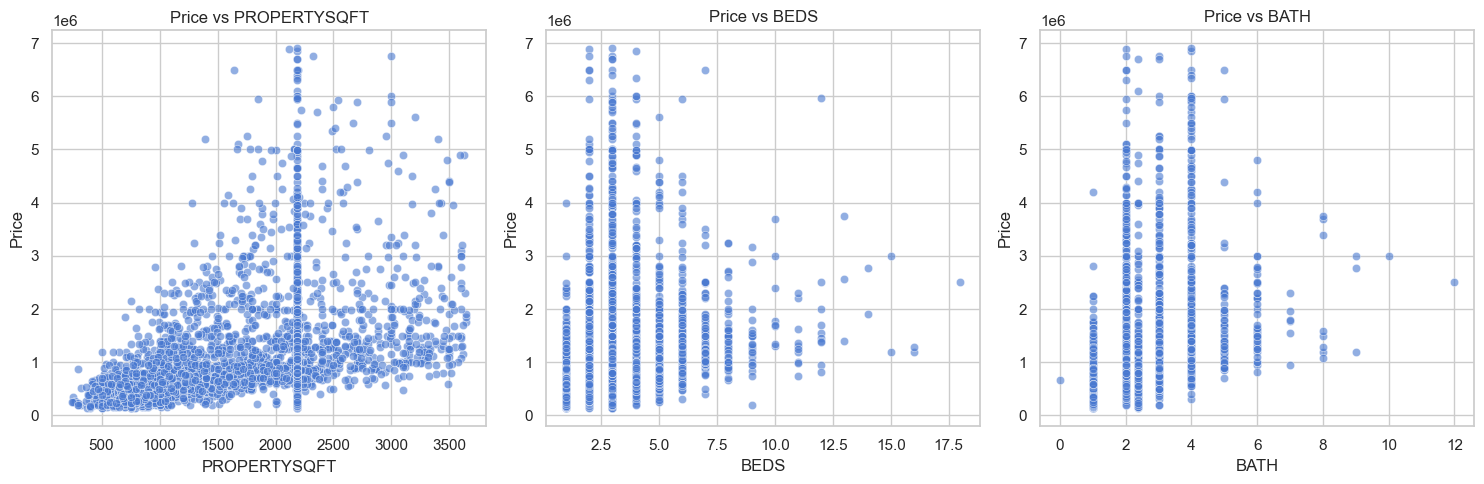

In [2515]:
sns.set(style="whitegrid", palette="muted")

# Các cột muốn so sánh với PRICE
cols = ["PROPERTYSQFT", "BEDS", "BATH"]

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=col, y="PRICE", data=df_normal, alpha=0.6)
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    
plt.tight_layout()
plt.show()

In [2516]:
df_normal['PROPERTYSQFT'].value_counts()

PROPERTYSQFT
2184.207862    1471
800.000000       53
900.000000       51
750.000000       50
1200.000000      48
               ... 
2515.000000       1
2736.000000       1
1394.000000       1
2172.000000       1
1675.000000       1
Name: count, Length: 1146, dtype: int64

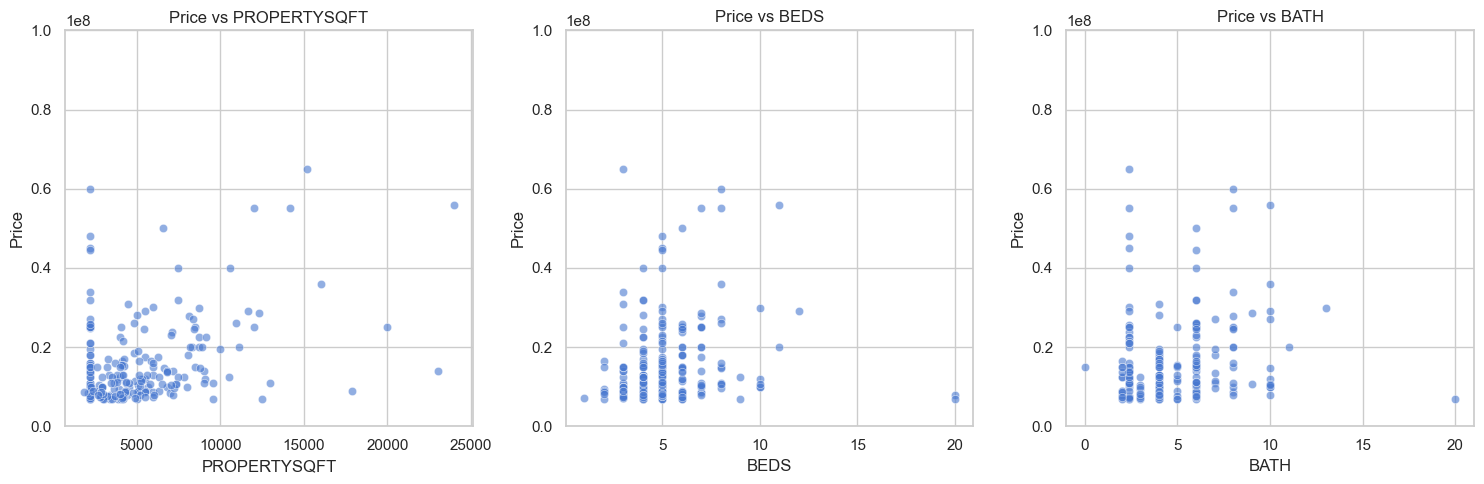

In [2517]:

# Các cột muốn so sánh với PRICE
cols = ["PROPERTYSQFT", "BEDS", "BATH"]

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=col, y="PRICE", data=df_luxury, alpha=0.6)
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.ylim(0, 1e8) 
    
plt.tight_layout()
plt.show()

- Diện tích là yếu tố quan trọng nhất đối với nhà thường, và vẫn là một trong các yếu tố với nhà luxury, nhưng luxury giá cao không phụ thuộc tuyến tính vào diện tích.

- Số phòng ngủ và phòng tắm chỉ là yếu tố phụ, không quyết định giá chính, đặc biệt với phân khúc luxury.

- Nhóm nhà thường chiếm đại đa số thị trường → dễ phân tích, dễ xây dựng mô hình định giá chuẩn.

- Luxury/outlier cần phân tích riêng → định giá dựa trên nhiều yếu tố khác ngoài số phòng và diện tích (vị trí, tiện ích, thiết kế, tiềm năng đầu tư).

- Có một số nhà nhỏ nhưng giá cao trong nhóm luxury → gợi ý yếu tố ngoài diện tích/số phòng, có thể là view, vị trí, hoặc thương hiệu chủ sở hữu.

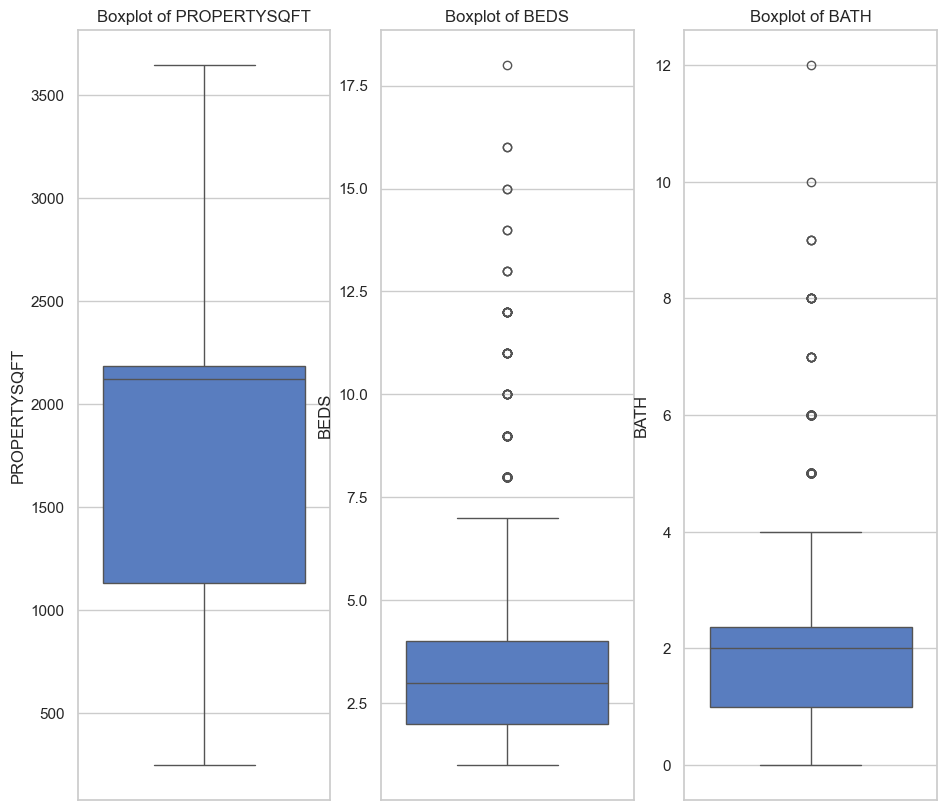

In [2518]:
# Box plots for each of the variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_normal[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
               

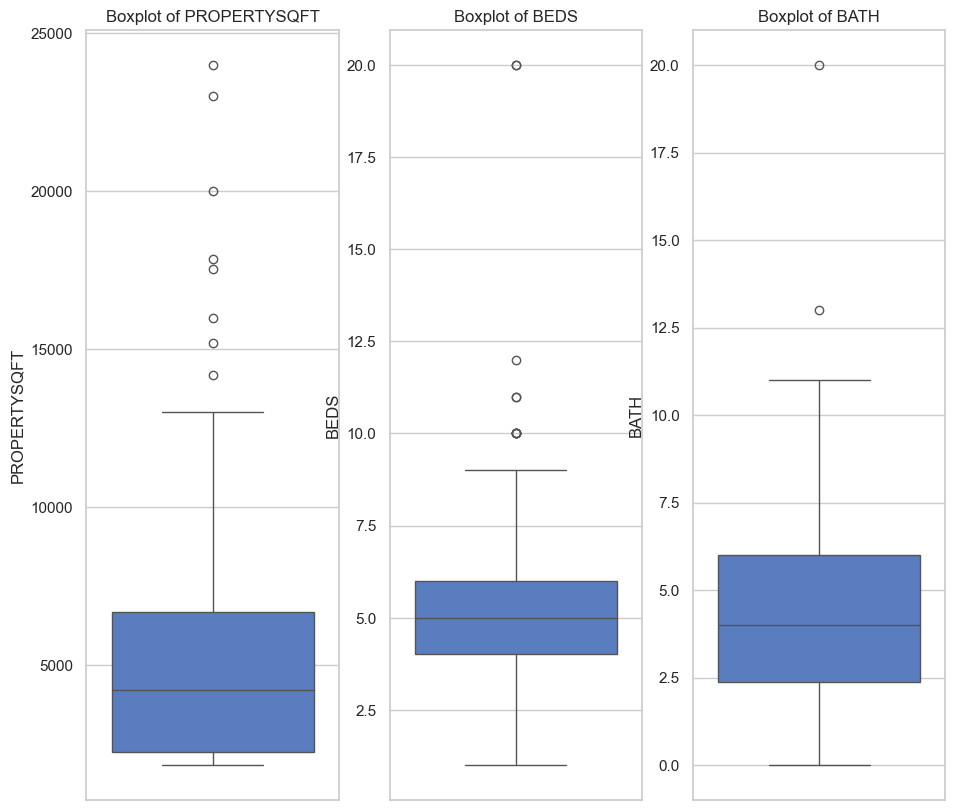

In [2519]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=df_luxury[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
               

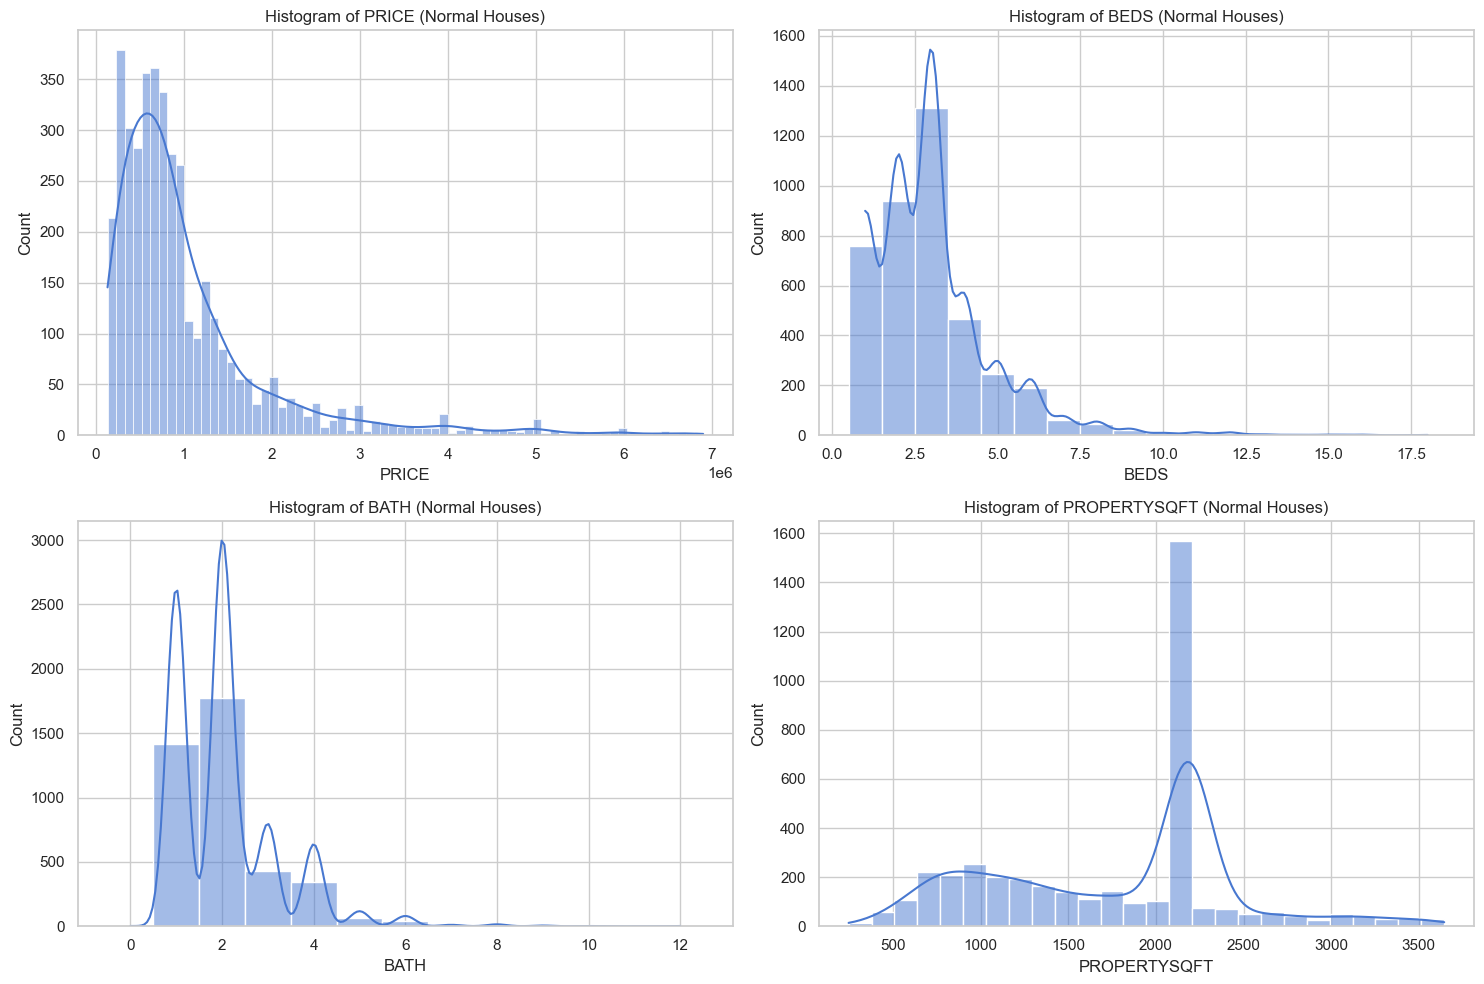

,PRICE,BEDS,BATH,PROPERTYSQFT
count,4.080000e+03,4080.000000,4080.000000,4080.000000
mean,1.053430e+06,3.007108,2.061035,1763.788913
std,9.797065e+05,1.806718,1.132492,696.443038
min,1.350000e+05,1.000000,0.000000,246.000000
25%,4.696660e+05,2.000000,1.000000,1131.500000
50%,7.500000e+05,3.000000,2.000000,2122.500000
75%,1.250000e+06,4.000000,2.373861,2184.207862
max,6.900000e+06,18.000000,12.000000,3645.000000


In [2520]:
# Descriptive statistics for normal houses (không luxury)
descriptive_stats_normal = df_normal[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].describe()

# Visualizing the distributions with histograms (normal houses only)
plt.figure(figsize=(15, 10))

# Histogram for PRICE
plt.subplot(2, 2, 1)
sns.histplot(df_normal['PRICE'], kde=True)
plt.title('Histogram of PRICE (Normal Houses)')

# Histogram for BEDS
plt.subplot(2, 2, 2)
sns.histplot(df_normal['BEDS'], kde=True, discrete=True)
plt.title('Histogram of BEDS (Normal Houses)')

# Histogram for BATH
plt.subplot(2, 2, 3)
sns.histplot(df_normal['BATH'], kde=True, discrete=True)
plt.title('Histogram of BATH (Normal Houses)')

# Histogram for PROPERTYSQFT
plt.subplot(2, 2, 4)
sns.histplot(df_normal['PROPERTYSQFT'], kde=True)
plt.title('Histogram of PROPERTYSQFT (Normal Houses)')

plt.tight_layout()
plt.show()

descriptive_stats_normal


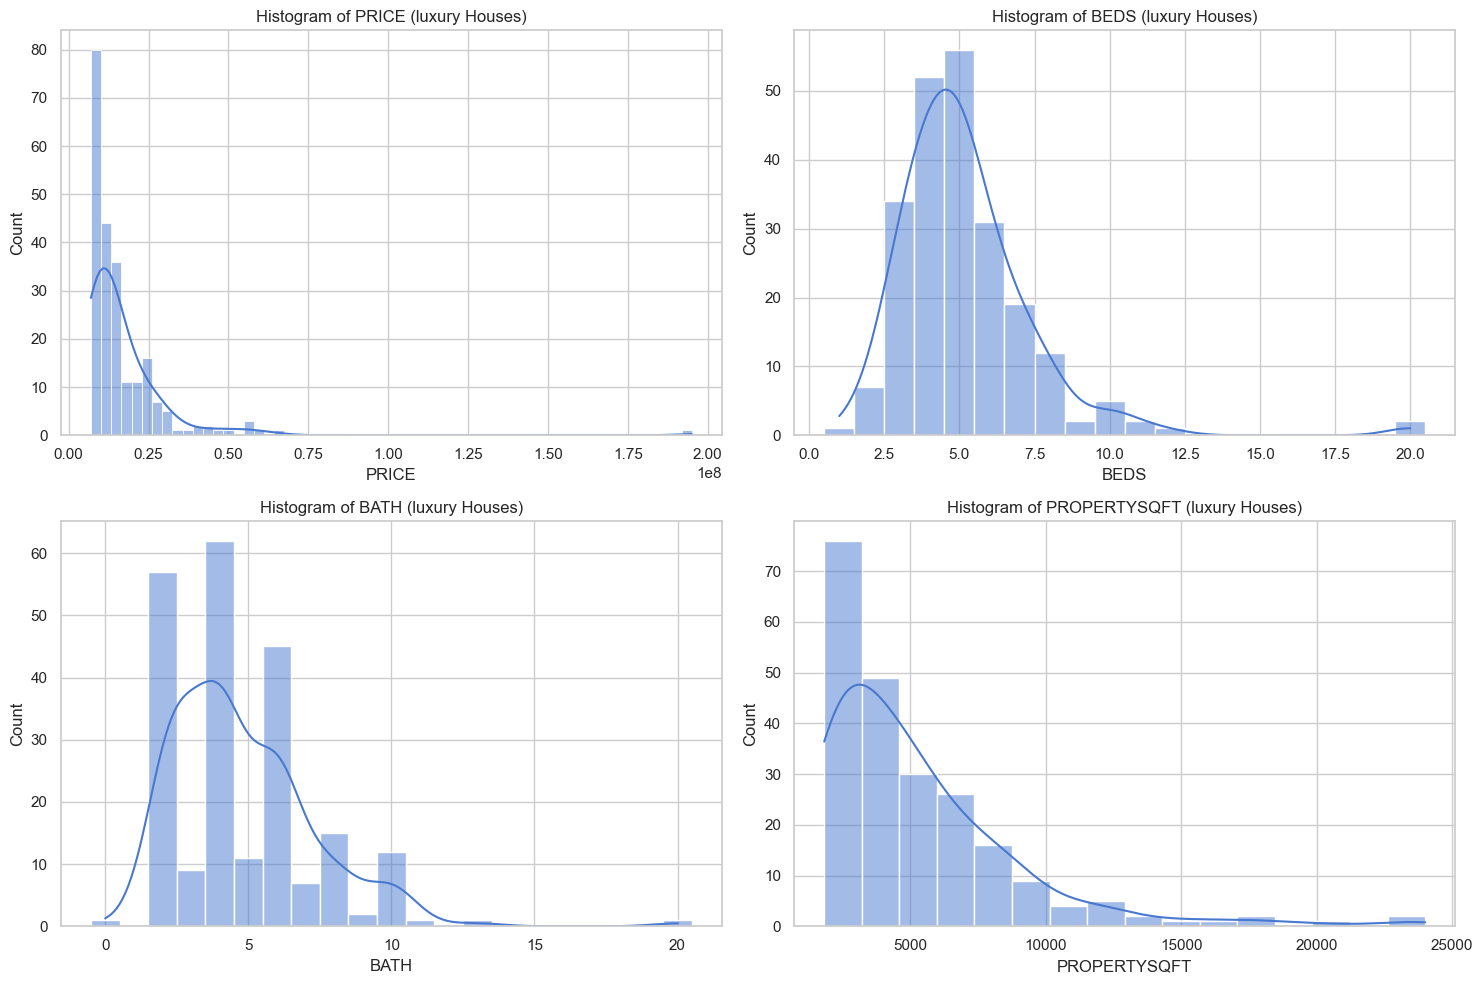

,PRICE,BEDS,BATH,PROPERTYSQFT
count,2.240000e+02,224.000000,224.000000,224.000000
mean,1.658280e+07,5.187500,4.827901,5266.224217
std,1.588448e+07,2.321787,2.507224,3662.233337
min,6.975000e+06,1.000000,0.000000,1830.000000
25%,8.825000e+06,4.000000,2.373861,2226.801965
50%,1.250000e+07,5.000000,4.000000,4196.500000
75%,1.861250e+07,6.000000,6.000000,6672.000000
max,1.950000e+08,20.000000,20.000000,24000.000000


In [2521]:
descriptive_stats_normal = df_luxury[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].describe()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df_luxury['PRICE'], kde=True)
plt.title('Histogram of PRICE (luxury Houses)')

plt.subplot(2, 2, 2)
sns.histplot(df_luxury['BEDS'], kde=True, discrete=True)
plt.title('Histogram of BEDS (luxury Houses)')

plt.subplot(2, 2, 3)
sns.histplot(df_luxury['BATH'], kde=True, discrete=True)
plt.title('Histogram of BATH (luxury Houses)')

plt.subplot(2, 2, 4)
sns.histplot(df_luxury['PROPERTYSQFT'], kde=True)
plt.title('Histogram of PROPERTYSQFT (luxury Houses)')

plt.tight_layout()
plt.show()

descriptive_stats_normal


#### Chuẩn hóa địa chỉ

In [2522]:
df

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,segment
0,douglas elliman,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,unknown,condo,Normal
1,serhant,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,unknown,condo,Luxury
2,sowae corp,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,unknown,house,Normal
3,compass,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,unknown,condo,Outlier
4,sotheby's,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,unknown,townhouse,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,compass,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,unknown,co op,Normal
4797,mjr real estate,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,unknown,co op,Normal
4798,douglas elliman,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,unknown,co op,Normal
4799,e corp,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,unknown,condo,Normal


In [2523]:
df["STREET_NAME"].value_counts()

STREET_NAME
Manhattan          930
Brooklyn           696
Queens             655
Staten Island      461
The Bronx          294
                  ... 
2501                 1
67th Drive           1
Todt Hill            1
Saunders Street      1
Mount Eden           1
Name: count, Length: 174, dtype: int64

In [2524]:
# xóa do bị trộn cấp đường và quận
df_clean = df.drop(columns='STREET_NAME')

In [2525]:
df_clean

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,segment
0,douglas elliman,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,unknown,condo,Normal
1,serhant,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,unknown,condo,Luxury
2,sowae corp,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,unknown,house,Normal
3,compass,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,unknown,condo,Outlier
4,sotheby's,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,unknown,townhouse,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,compass,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,unknown,co op,Normal
4797,mjr real estate,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,unknown,co op,Normal
4798,douglas elliman,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,unknown,co op,Normal
4799,e corp,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,unknown,condo,Normal


In [2526]:
df_clean["SUBLOCALITY"].value_counts()

SUBLOCALITY
New York            967
Kings County        696
Queens County       655
Queens              534
Richmond County     461
Brooklyn            442
Bronx County        291
New York County     271
The Bronx           174
Staten Island        58
Manhattan            21
Flushing              4
Coney Island          3
Riverdale             3
East Bronx            1
Jackson Heights       1
Brooklyn Heights      1
Rego Park             1
Fort Hamilton         1
Dumbo                 1
Snyder Avenue         1
Name: count, dtype: int64

90% là Borough( cấp huyện)

In [2527]:
df = df.drop(columns=['MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2','SUBLOCALITY'])


In [2528]:
df_clean["LOCALITY"].value_counts()

LOCALITY
New York           2395
New York County     930
Queens County       536
Kings County        442
Bronx County        172
Richmond County      58
United States        37
Queens                6
Brooklyn              6
The Bronx             4
Flatbush              1
Name: count, dtype: int64

In [2529]:
borough_map = {
    'New York': 'Manhattan',
    'New York County': 'Manhattan',
    'Manhattan': 'Manhattan',
    'Brooklyn': 'Brooklyn',
    'Kings County': 'Brooklyn',
    'Queens': 'Queens',
    'Queens County': 'Queens',
    'Bronx': 'Bronx',
    'Bronx County': 'Bronx',
    'The Bronx': 'Bronx',
    'Staten Island': 'Staten Island',
    'Richmond County': 'Staten Island',
    'United States': np.nan,  # Lỗi
    'Flatbush': np.nan       # Neighborhood nhầm
}
df_clean['BOROUGH'] = df_clean['LOCALITY'].map(borough_map)
df_clean = df_clean.dropna(subset=['BOROUGH'])
df_clean = df_clean.drop(columns=['LOCALITY'])
print("Phân bố BOROUGH:\n", df_clean['BOROUGH'].value_counts())

Phân bố BOROUGH:
 BOROUGH
Manhattan        3325
Queens            542
Brooklyn          448
Bronx             176
Staten Island      58
Name: count, dtype: int64


In [2530]:
df_clean['PROPERTYSQFT'].value_counts()

PROPERTYSQFT
2184.207862    1529
800.000000       53
750.000000       51
900.000000       50
1200.000000      47
               ... 
1341.000000       1
771.000000        1
4017.000000       1
759.000000        1
3786.000000       1
Name: count, Length: 1434, dtype: int64

In [2531]:
import os

state_split = df_clean['STATE'].str.extract(r'^(.*?),\s*([A-Z]{2})\s*(\d+)?$')
# state_split có 3 cột: 0=STATE_NAME, 1=STATE_CODE, 2=ZIP

# Gán vào dataframe
df_clean['ZIP'] = state_split[2]
df_clean = df_clean.drop(
    columns=['STATE', 'ADDRESS', 'MAIN_ADDRESS', 
             'ADMINISTRATIVE_AREA_LEVEL_2', 'SUBLOCALITY', 'LONG_NAME']
)

df_clean = df_clean[df_clean['PROPERTYSQFT'] != 2184.207862]

folder = r'E:\ny_housing_project\data'
file_name = 'NY-House-Dataset-Cleaned.csv'
file_path = os.path.join(folder, file_name)

# Kiểm tra file tồn tại chưa
if not os.path.exists(file_path):
    df_clean.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(f"File đã được lưu: {file_path}")
else:
    print(f"File đã tồn tại, không lưu: {file_path}")

File đã tồn tại, không lưu: E:\ny_housing_project\data\NY-House-Dataset-Cleaned.csv


In [2532]:
df_clean['PRICE_log'] = np.log1p(df_clean['PRICE'])

normal_houses = df_clean[df_clean['segment']=='Normal']


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5516\3996958407.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(normal_houses['PRICE_log'], shade=True)


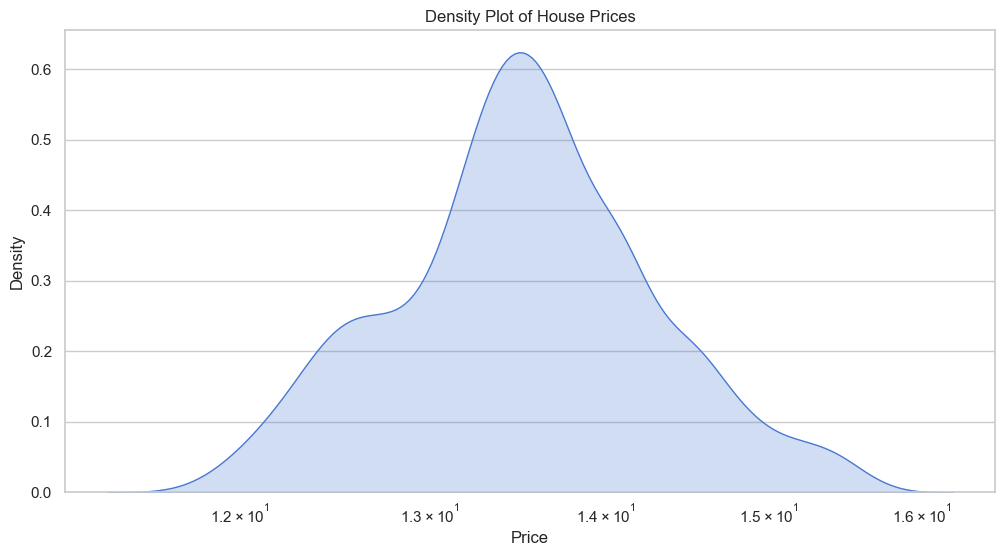

In [2533]:
plt.figure(figsize=(12, 6))
sns.kdeplot(normal_houses['PRICE_log'], shade=True)
plt.title('Density Plot of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.xscale('log')  # log scale nếu giá có outlier cực lớn
plt.show()


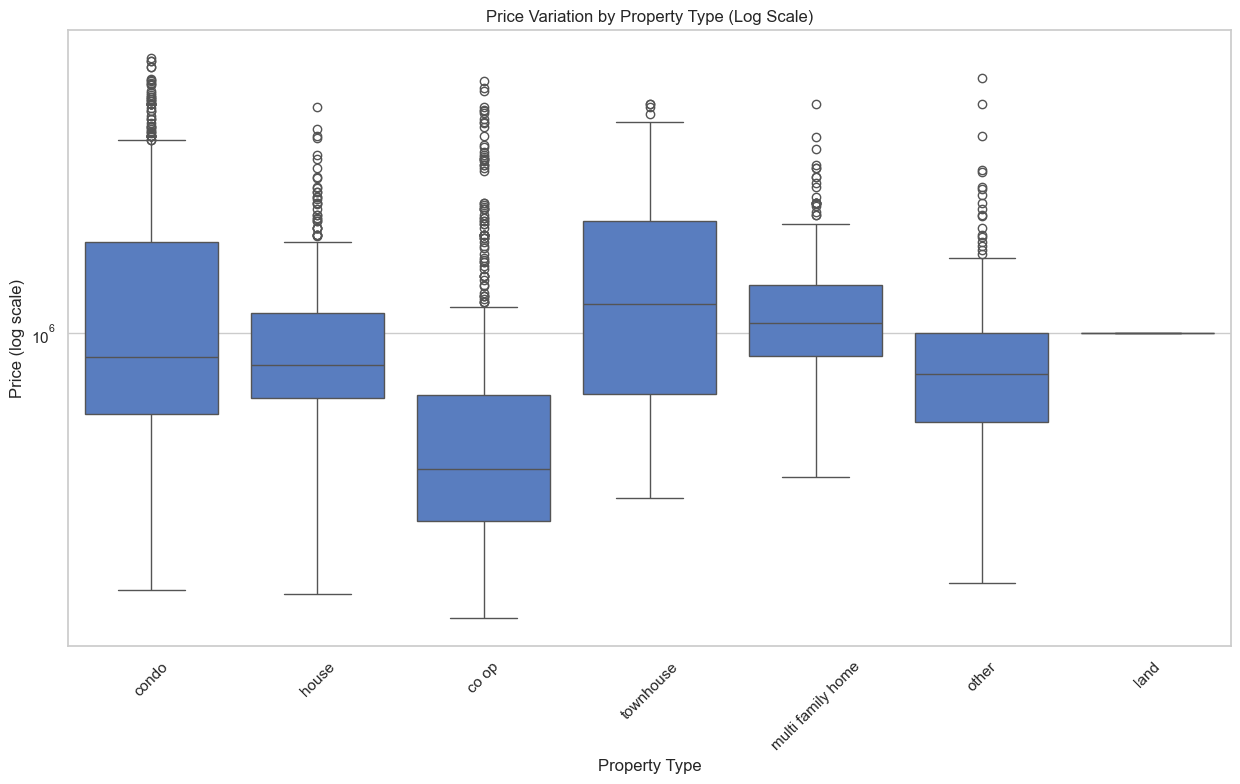

In [2534]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='PROPERTY_TYPE', y='PRICE', data=normal_houses)
plt.xticks(rotation=45)
plt.yscale('log')  # chuyển log
plt.title('Price Variation by Property Type (Log Scale)')
plt.ylabel('Price (log scale)')
plt.xlabel('Property Type')
plt.show()


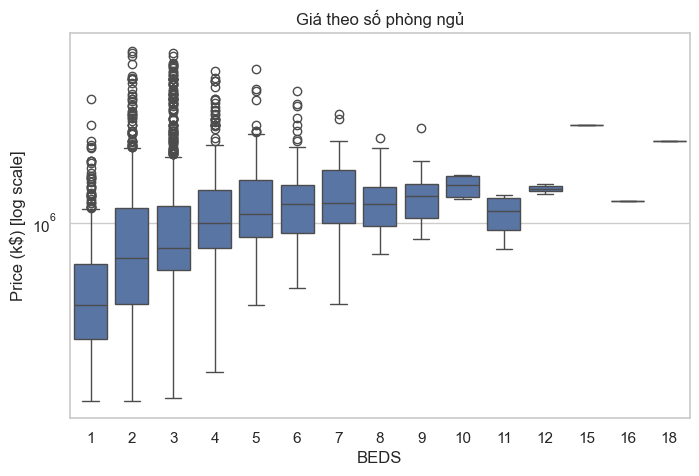

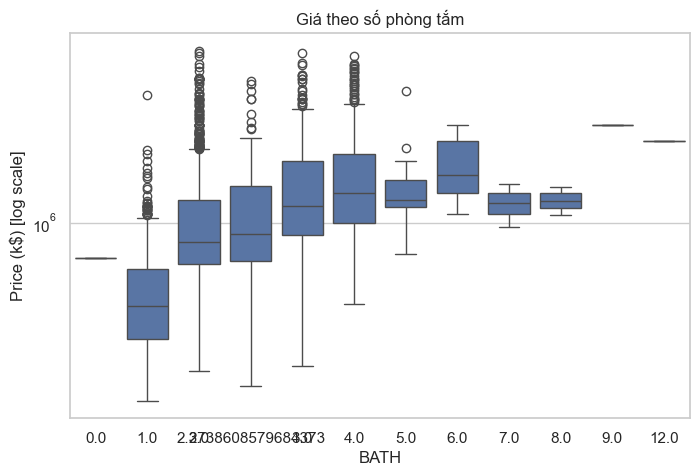

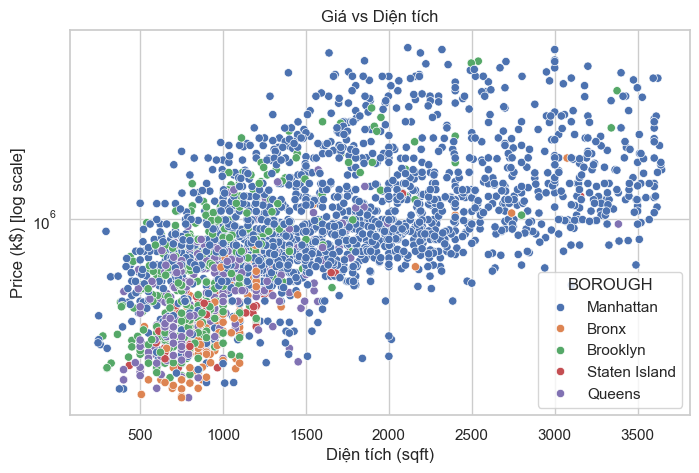

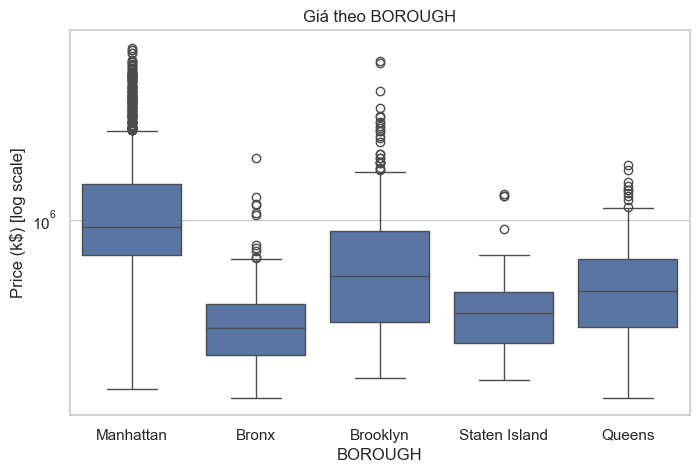

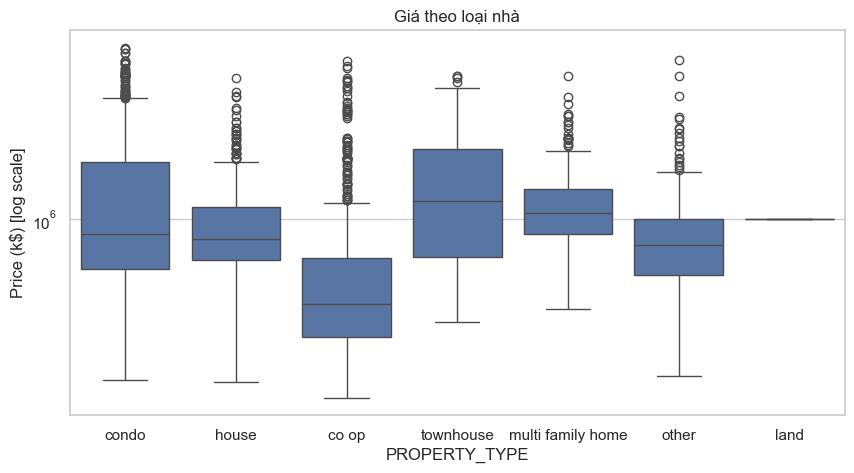

In [2535]:
# Đặt style đẹp hơn
sns.set(style="whitegrid")

# 1️⃣ Giá theo số phòng ngủ
plt.figure(figsize=(8,5))
sns.boxplot(x='BEDS', y='PRICE', data=normal_houses)
plt.yscale('log')  # dùng log vì giá có outlier
plt.title('Giá theo số phòng ngủ')
plt.ylabel('Price (k$) [log scale]')
plt.show()

# 2️⃣ Giá theo số phòng tắm
plt.figure(figsize=(8,5))
sns.boxplot(x='BATH', y='PRICE', data=normal_houses)
plt.yscale('log')
plt.title('Giá theo số phòng tắm')
plt.ylabel('Price (k$) [log scale]')
plt.show()

# 3️⃣ Giá theo diện tích
plt.figure(figsize=(8,5))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', hue='BOROUGH', data=normal_houses)
plt.yscale('log')
plt.title('Giá vs Diện tích')
plt.xlabel('Diện tích (sqft)')
plt.ylabel('Price (k$) [log scale]')
plt.show()

# 4️⃣ Giá theo quận (BOROUGH)
plt.figure(figsize=(8,5))
sns.boxplot(x='BOROUGH', y='PRICE', data=normal_houses)
plt.yscale('log')
plt.title('Giá theo BOROUGH')
plt.ylabel('Price (k$) [log scale]')
plt.show()

# 5️⃣ Giá theo loại nhà (PROPERTY_TYPE)
plt.figure(figsize=(10,5))
sns.boxplot(x='PROPERTY_TYPE', y='PRICE', data=normal_houses)
plt.yscale('log')
plt.title('Giá theo loại nhà')
plt.ylabel('Price (k$) [log scale]')
plt.show()

